In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#import list

In [2]:
end=dt.datetime.today()
year=end.year
styear= year-4
start=end.replace(year=styear)

df=web.DataReader ('TSLA','yahoo',start,end)
df
#rolling data so to collect data from 4 years back of current day and to set up style of graphs

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-16,162.949997,154.110001,158.699997,155.169998,5593800,155.169998
2016-02-17,169.339996,156.679993,159.000000,168.679993,5825200,168.679993
2016-02-18,172.949997,164.770004,172.419998,166.770004,3887600,166.770004
2016-02-19,167.490005,162.500000,163.660004,166.580002,2959400,166.580002
2016-02-22,178.910004,169.850006,170.119995,177.740005,5060100,177.740005
...,...,...,...,...,...,...
2020-02-10,819.989990,752.400024,800.000000,771.280029,24689200,771.280029
2020-02-11,783.510010,758.000000,768.789978,774.380005,11697500,774.380005
2020-02-12,789.750000,763.369995,777.869995,767.289978,12022500,767.289978


In [3]:
df.reset_index(level=0,inplace=True)
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime("%Y%m%d")
#moving the date index into a column and turning it into an int to make processing easy

In [4]:
df.columns
#all the names of each column (not including the index)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
df["Gain"]=df["Close"]-df["Open"]
df
#Addition and subtraction of columns to generate a new column

,Date,High,Low,Open,Close,Volume,Adj Close,Gain
0,20160216,162.949997,154.110001,158.699997,155.169998,5593800,155.169998,-3.529999
1,20160217,169.339996,156.679993,159.000000,168.679993,5825200,168.679993,9.679993
2,20160218,172.949997,164.770004,172.419998,166.770004,3887600,166.770004,-5.649994
3,20160219,167.490005,162.500000,163.660004,166.580002,2959400,166.580002,2.919998
4,20160222,178.910004,169.850006,170.119995,177.740005,5060100,177.740005,7.620010
...,...,...,...,...,...,...,...,...
1003,20200210,819.989990,752.400024,800.000000,771.280029,24689200,771.280029,-28.719971
1004,20200211,783.510010,758.000000,768.789978,774.380005,11697500,774.380005,5.590027
1005,20200212,789.750000,763.369995,777.869995,767.289978,12022500,767.289978,-10.580017
1006,20200213,818.000000,735.000000,741.840027,804.000000,26231600,804.000000,62.159973


In [6]:
y=df.Gain
Features=["Date","High","Low","Volume","Open"]
X=df[Features]

Xnd=X.drop(['Date'],axis=1)

begTSLA_model=DecisionTreeRegressor(random_state=1)

begTSLA_model.fit(Xnd,y)
predictedgain=begTSLA_model.predict(Xnd)
mean_absolute_error(y,predictedgain)#I Have not seperated the data hence a small mean absolute error 

3.0275375124007935e-08

In [7]:

train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0)
#Splitting data so that one set trains another applies to new data




proTSLA_model=DecisionTreeRegressor(random_state=1)

proTSLA_model.fit(train_X,train_y)
val_predictedgain=proTSLA_model.predict(val_X)
mean_absolute_error(val_y,val_predictedgain)

6.251151190863715

In [8]:
train_X

,Date,High,Low,Volume,Open
385,20170824,356.660004,349.739990,4584700,352.519989
620,20180801,303.000000,293.000000,10129400,297.989990
2,20160218,172.949997,164.770004,3887600,172.419998
481,20180111,344.809998,333.260010,6645500,335.239990
477,20180105,317.239990,312.000000,4591200,316.619995
...,...,...,...,...,...
835,20190611,220.899994,213.500000,11653500,219.139999
192,20161116,184.729996,181.210007,3434400,182.649994
629,20180814,359.200012,347.100006,6986400,358.450012
559,20180504,296.859985,279.519989,8569400,283.000000


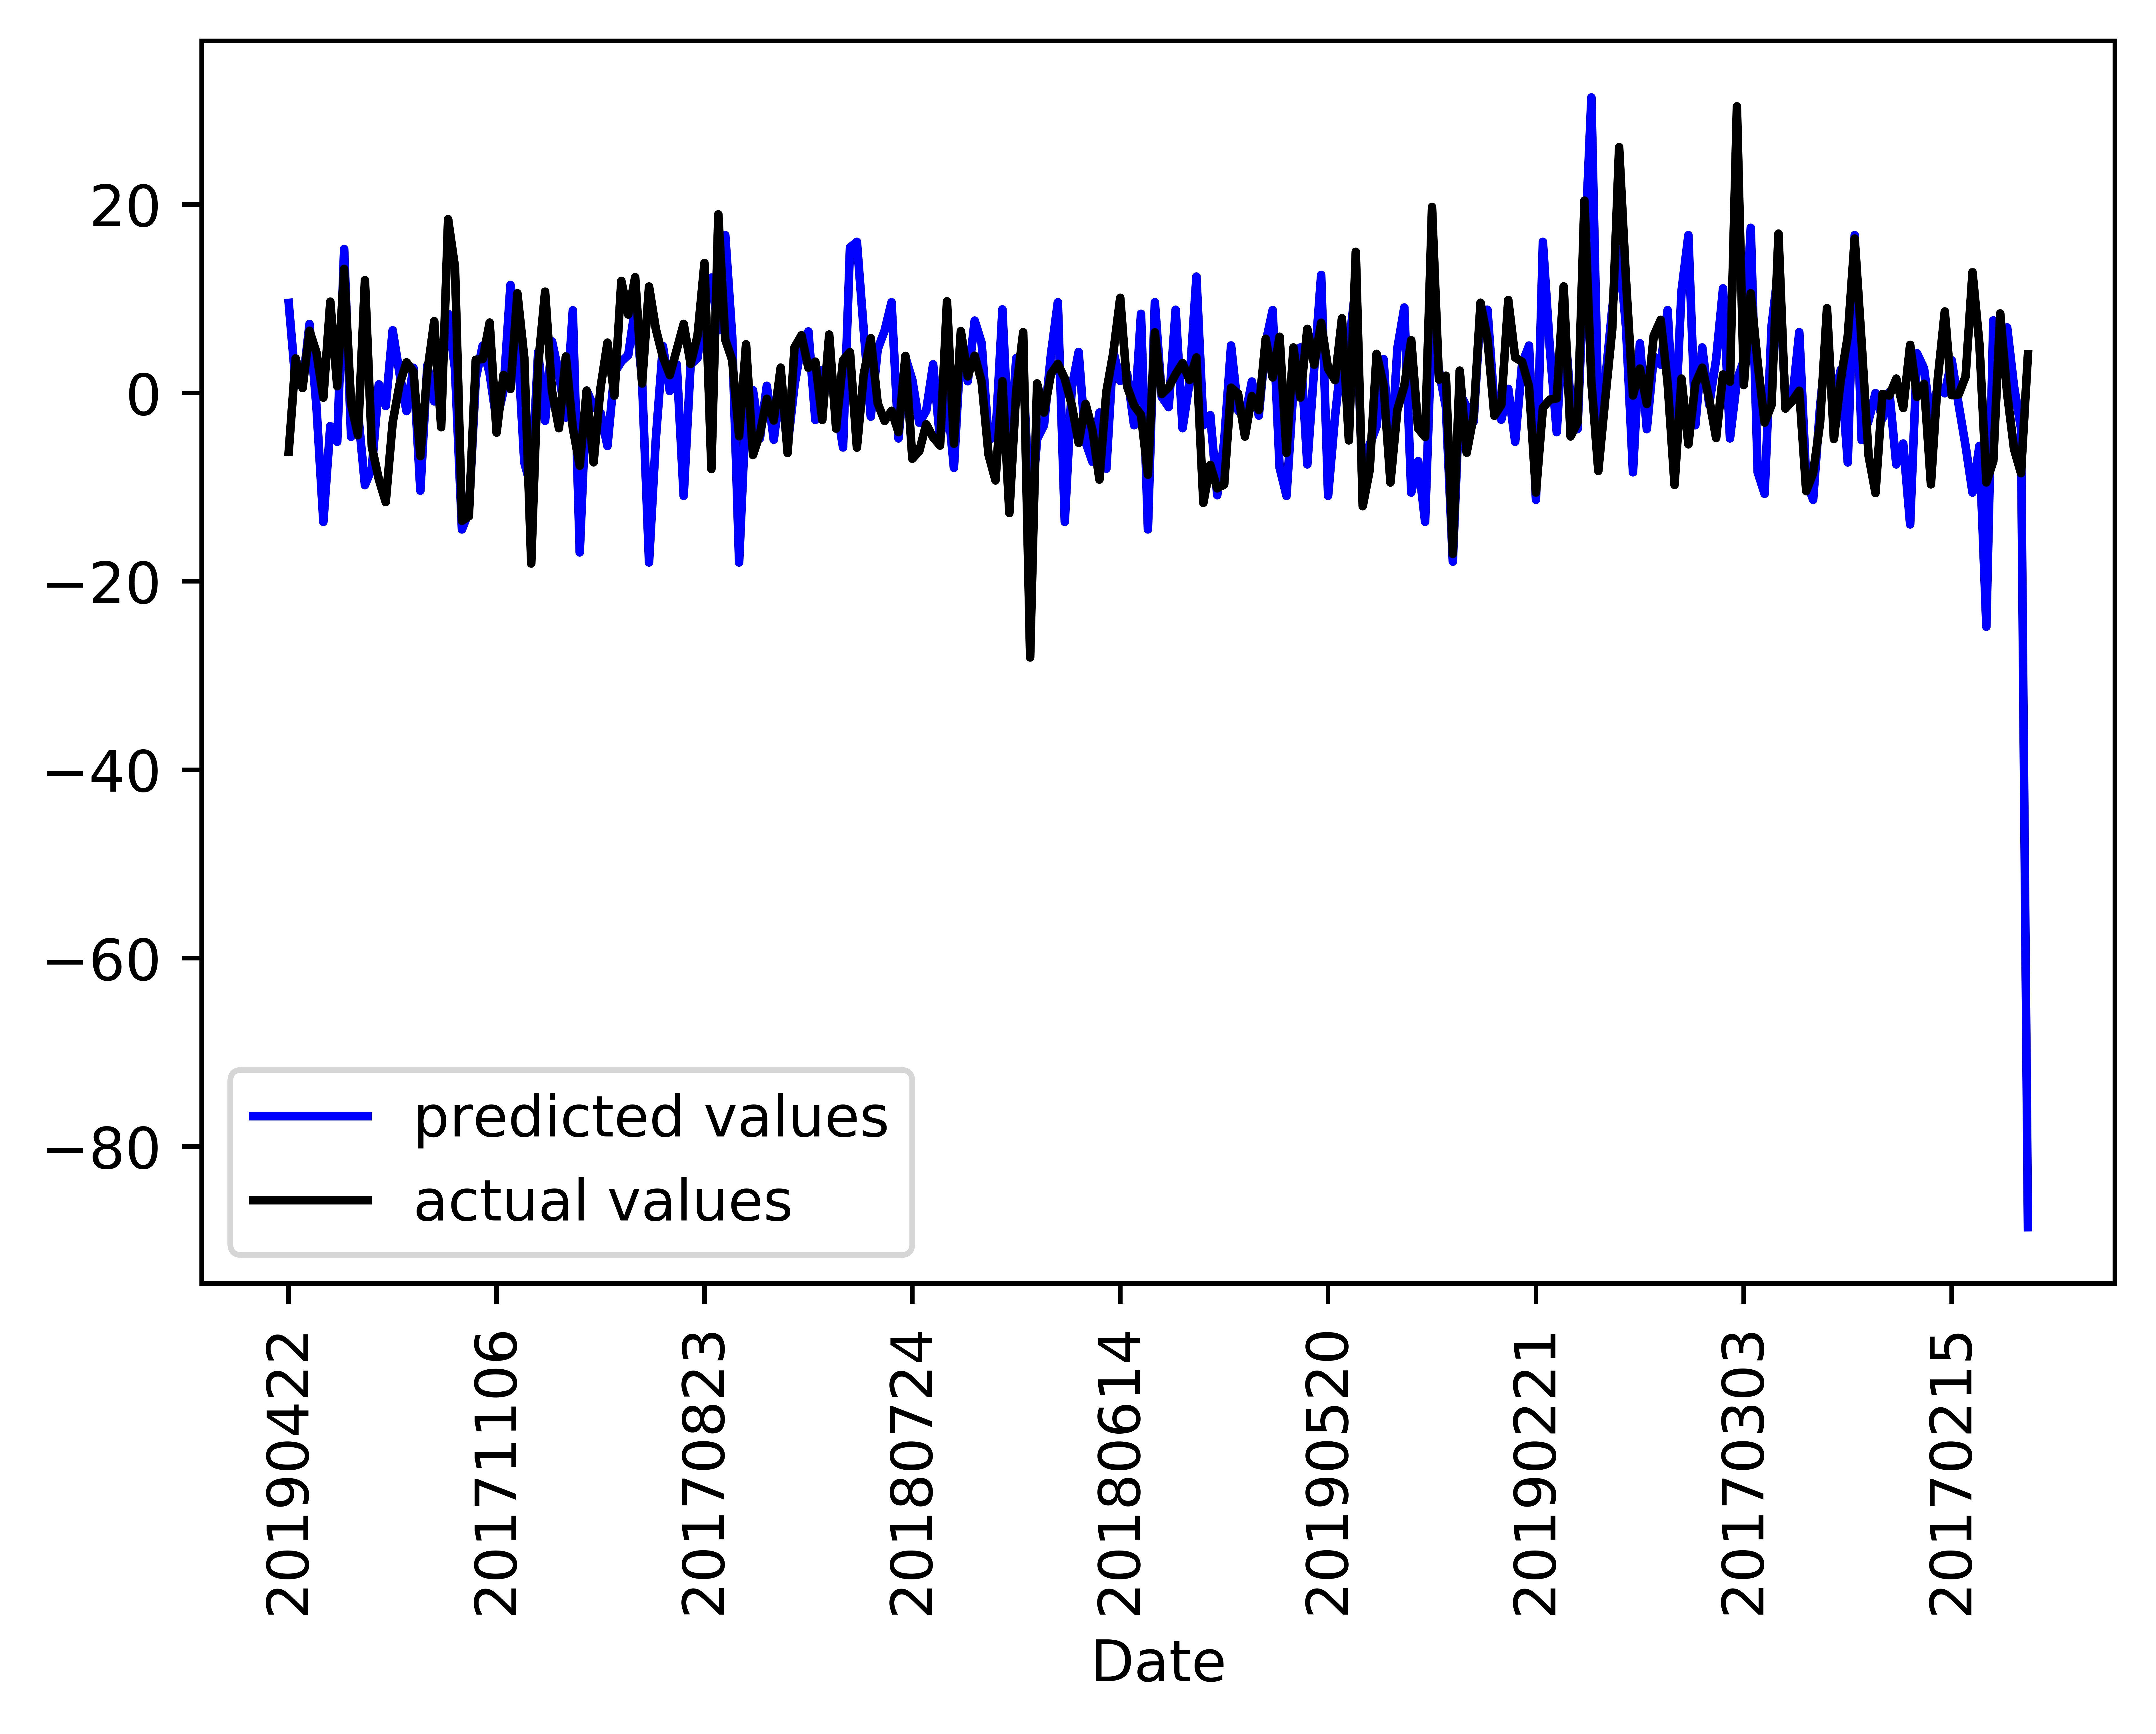

In [9]:
z=val_X.Date

plt.figure(dpi=1440)

plt.plot(z,val_predictedgain,Label="predicted values",c='b')
plt.plot(z,val_y,Label="actual values",c='k')

plt.gca().xaxis.set_major_locator(plt.MaxNLocator())
plt.xticks(rotation=90)

plt.legend(loc=0)
plt.xlabel("Date")

plt.savefig('Stock_Prediction_Graph_1')
plt.show()
#plot showing what my predicted result versus the reality of known data when model is apllied to unknown results
#Note the data has just been sent through the machine learning algorithm so there is/could be
# alot of noise in the data

In [10]:
def get_mae(max_leaf_nodes,train_X,val_X,train_y,val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [11]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  5
Max leaf nodes: 50  		 Mean Absolute Error:  6
Max leaf nodes: 500  		 Mean Absolute Error:  6
Max leaf nodes: 5000  		 Mean Absolute Error:  6
